In [1]:
# Imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading 
Master_data=pd.read_csv("/content/drive/MyDrive/Regression_2/Master_Data_mod_RUL.csv")
#Master_data=pd.read_csv("/content/drive/MyDrive/NASA_Turbofan/Master_Data.csv")

In [ ]:
Master_data

,Unnamed: 0,Engine_ID,Cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,...,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,Status,Sub_Status
0,0,1_1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,1,Working
1,1,1_1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,1,Working
2,2,1_1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,1,Working
3,3,1_1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,1,Working
4,4,1_1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,1,Working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,61244,249_4,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,...,8.4541,0.03,372,2319,100.0,29.11,17.5234,4,0,Critical
160355,61245,249_4,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,...,8.2221,0.03,396,2388,100.0,39.38,23.7151,3,0,Critical
160356,61246,249_4,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,...,8.2525,0.03,395,2388,100.0,39.78,23.8270,2,0,Critical
160357,61247,249_4,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,...,9.0515,0.02,337,2223,100.0,15.26,9.0774,1,0,Critical


In [ ]:
Master_data2=Master_data.drop_duplicates(subset=['Engine_ID'])

In [ ]:
Master_data2

,Unnamed: 0,Engine_ID,Cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,...,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,Status,Sub_Status
0,0,1_1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,8.4195,0.03,392,2388,100.00,39.06,23.4190,191,1,Working
192,192,2_1,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,...,8.3905,0.03,391,2388,100.00,38.94,23.4585,286,1,Working
479,479,3_1,1,0.0008,0.0005,100.0,518.67,642.04,1584.20,1398.13,...,8.4207,0.03,391,2388,100.00,38.96,23.3205,178,1,Working
658,658,4_1,1,0.0025,0.0005,100.0,518.67,642.60,1585.40,1402.85,...,8.4200,0.03,393,2388,100.00,39.04,23.3814,188,1,Working
847,847,5_1,1,0.0031,0.0002,100.0,518.67,641.77,1583.59,1395.26,...,8.4102,0.03,393,2388,100.00,38.98,23.4468,268,1,Working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159343,60233,245_4,1,0.0016,0.0001,100.0,518.67,641.70,1583.12,1398.14,...,8.3608,0.03,391,2388,100.00,39.09,23.4580,204,1,Working
159548,60438,246_4,1,35.0058,0.8406,100.0,449.44,554.97,1361.40,1125.89,...,9.3569,0.02,335,2223,100.00,14.86,8.8137,160,1,Working
159709,60599,247_4,1,10.0013,0.2517,100.0,489.05,604.14,1489.77,1288.58,...,8.6402,0.03,367,2319,100.00,28.59,17.0784,210,1,Working
159920,60810,248_4,1,25.0009,0.6214,60.0,462.54,536.45,1253.90,1049.70,...,10.8801,0.02,307,1915,84.93,14.38,8.5856,183,1,Working


In [4]:
df= Master_data.drop(columns= ['Sub_Status', 'Unnamed: 0','Status','Engine_ID','RUL'])

In [ ]:
df.describe()

,Cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,14.424935,...,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700
std,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,6.443922,...,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067
min,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,5.670000,...,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500
25%,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,8.000000,...,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300
50%,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,13.660000,...,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500
75%,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,21.610000,...,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600
max,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,21.610000,...,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500


<bound method NDFrame._add_numeric_operations.<locals>.skew of 0           1
1           2
2           3
3           4
4           5
         ... 
160354    251
160355    252
160356    253
160357    254
160358    255
Name: Cycle, Length: 160359, dtype: int64>


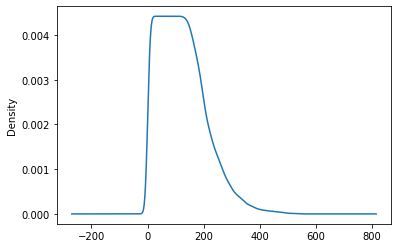

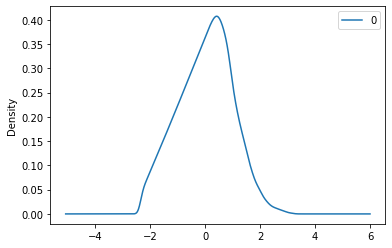

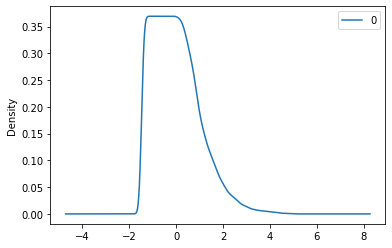

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         -0.0007
1          0.0019
2         -0.0043
3          0.0007
4         -0.0019
           ...   
160354     9.9998
160355     0.0028
160356     0.0029
160357    35.0046
160358    42.0030
Name: op1, Length: 160359, dtype: float64>


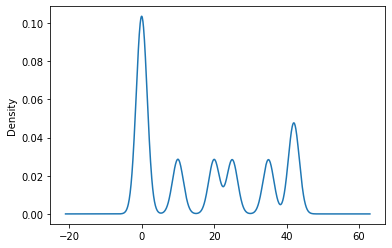

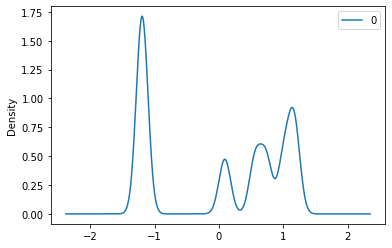

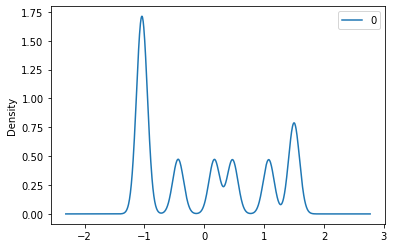

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0        -0.0004
1        -0.0003
2         0.0003
3         0.0000
4        -0.0002
           ...  
160354    0.2500
160355    0.0015
160356    0.0000
160357    0.8400
160358    0.8400
Name: op2, Length: 160359, dtype: float64>


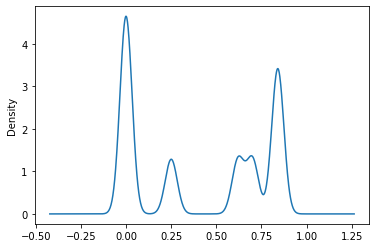

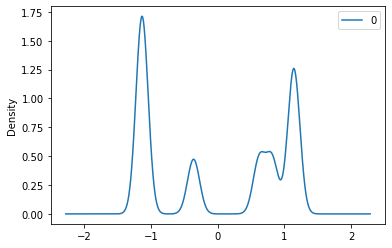

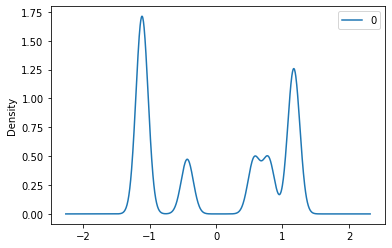

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         100
1         100
2         100
3         100
4         100
         ... 
160354    100
160355    100
160356    100
160357    100
160358    100
Name: op3, Length: 160359, dtype: int64>


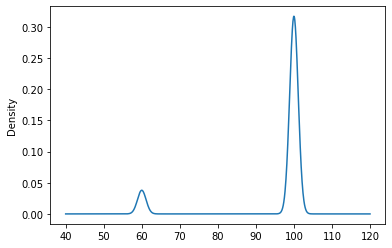

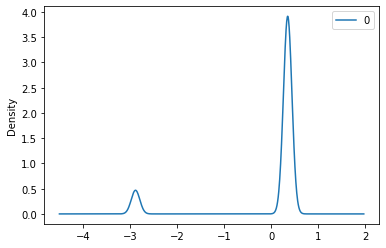

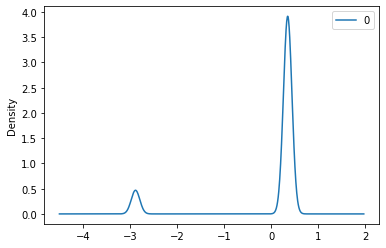

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         518.67
1         518.67
2         518.67
3         518.67
4         518.67
           ...  
160354    489.05
160355    518.67
160356    518.67
160357    449.44
160358    445.00
Name: sensor1, Length: 160359, dtype: float64>


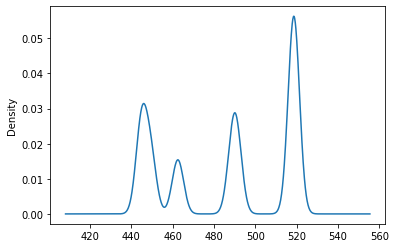

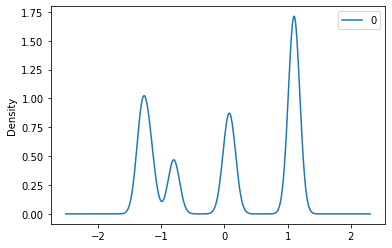

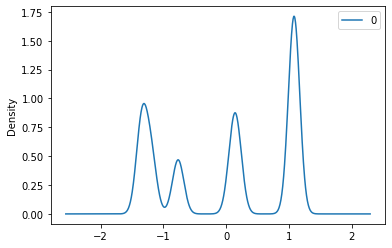

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         641.82
1         642.15
2         642.35
3         642.35
4         642.37
           ...  
160354    605.33
160355    643.42
160356    643.68
160357    555.77
160358    549.85
Name: sensor2, Length: 160359, dtype: float64>


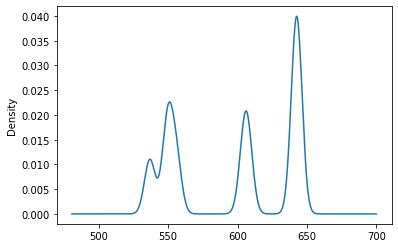

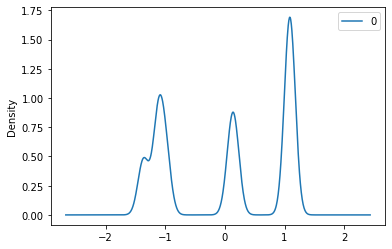

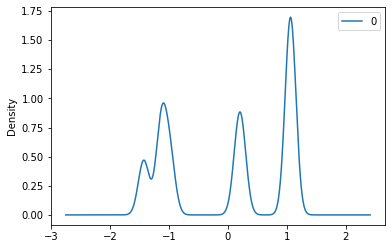

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         1589.70
1         1591.82
2         1587.99
3         1582.79
4         1582.85
           ...   
160354    1516.36
160355    1598.92
160356    1607.72
160357    1381.29
160358    1369.75
Name: sensor3, Length: 160359, dtype: float64>


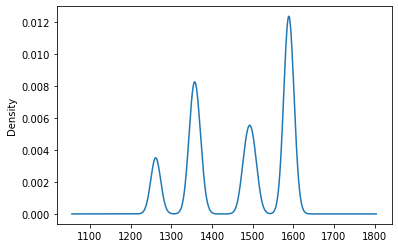

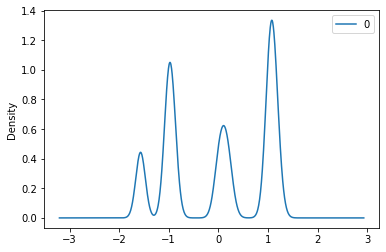

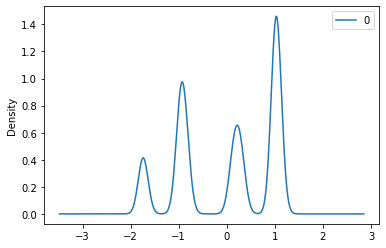

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         1400.60
1         1403.14
2         1404.20
3         1401.87
4         1406.22
           ...   
160354    1315.28
160355    1426.77
160356    1430.56
160357    1148.18
160358    1147.45
Name: sensor4, Length: 160359, dtype: float64>


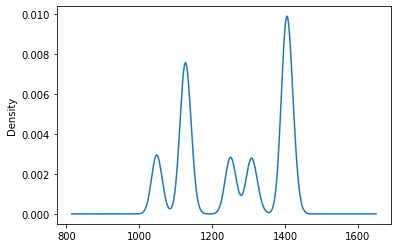

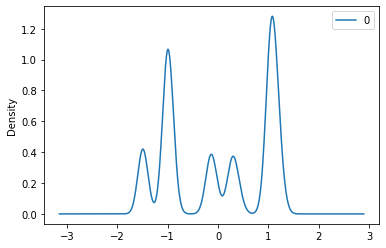

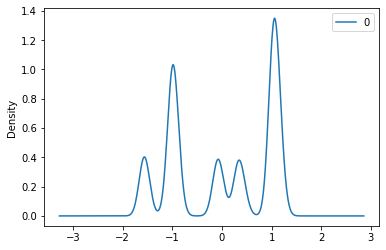

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         14.62
1         14.62
2         14.62
3         14.62
4         14.62
          ...  
160354    10.52
160355    14.62
160356    14.62
160357     5.48
160358     3.91
Name: sensor5, Length: 160359, dtype: float64>


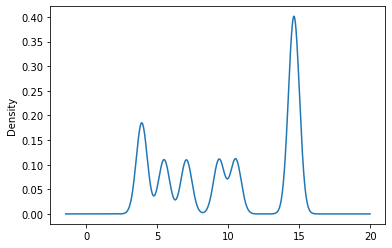

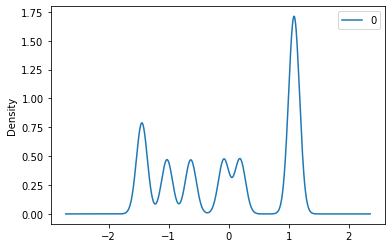

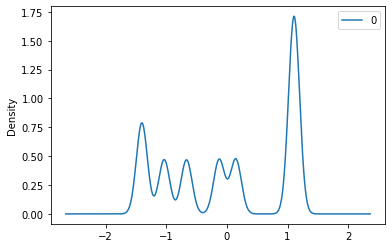

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         21.61
1         21.61
2         21.61
3         21.61
4         21.61
          ...  
160354    15.46
160355    21.57
160356    21.57
160357     7.96
160358     5.69
Name: sensor6, Length: 160359, dtype: float64>


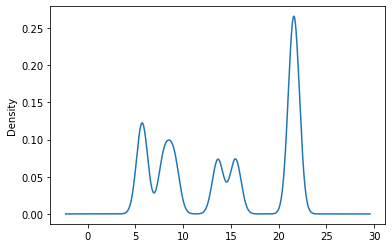

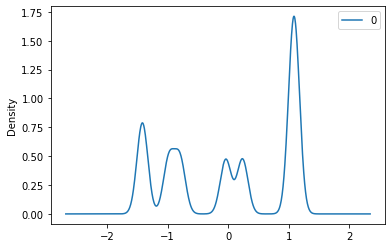

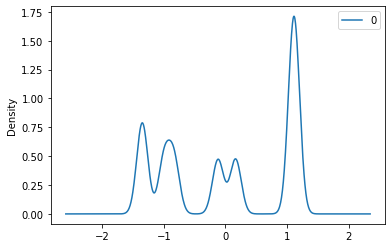

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         554.36
1         553.75
2         554.26
3         554.45
4         554.00
           ...  
160354    404.59
160355    567.59
160356    569.04
160357    199.93
160358    142.47
Name: sensor7, Length: 160359, dtype: float64>


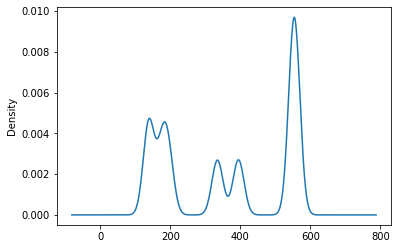

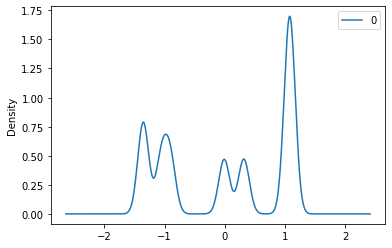

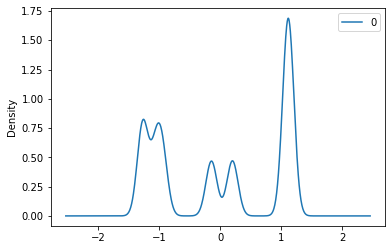

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         2388.06
1         2388.04
2         2388.08
3         2388.11
4         2388.06
           ...   
160354    2319.66
160355    2388.47
160356    2388.51
160357    2223.78
160358    2212.52
Name: sensor8, Length: 160359, dtype: float64>


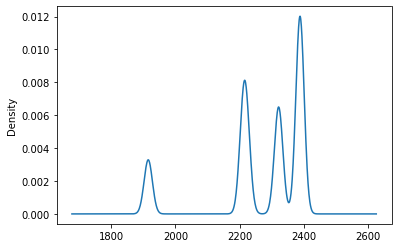

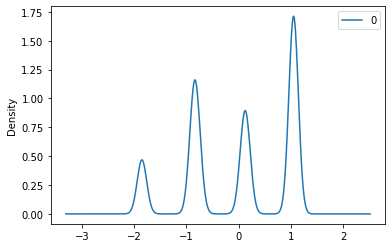

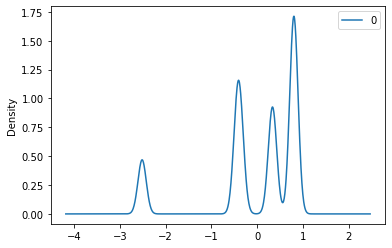

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         9046.19
1         9044.07
2         9052.94
3         9049.48
4         9055.15
           ...   
160354    8840.16
160355    9117.12
160356    9126.53
160357    8403.64
160358    8391.31
Name: sensor9, Length: 160359, dtype: float64>


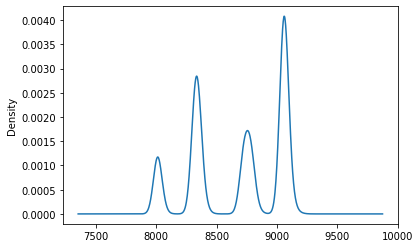

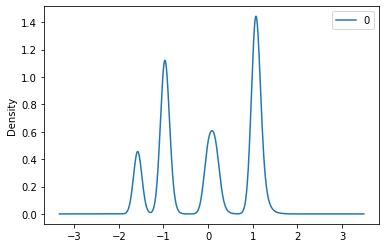

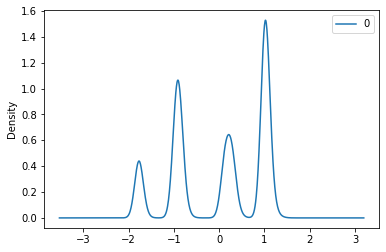

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         1.30
1         1.30
2         1.30
3         1.30
4         1.30
          ... 
160354    1.27
160355    1.31
160356    1.31
160357    1.05
160358    1.05
Name: sensor10, Length: 160359, dtype: float64>


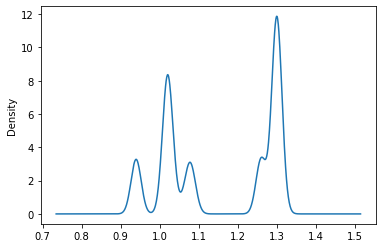

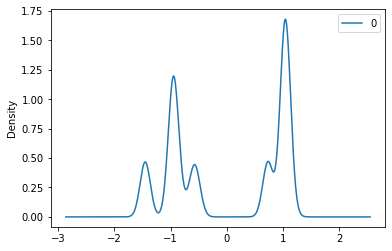

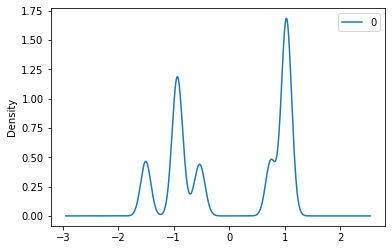

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         47.47
1         47.49
2         47.27
3         47.13
4         47.28
          ...  
160354    46.08
160355    48.04
160356    48.24
160357    42.53
160358    42.60
Name: sensor11, Length: 160359, dtype: float64>


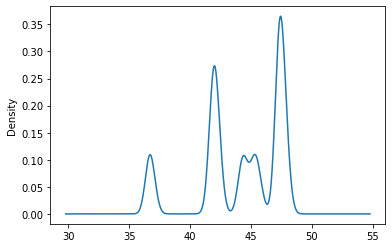

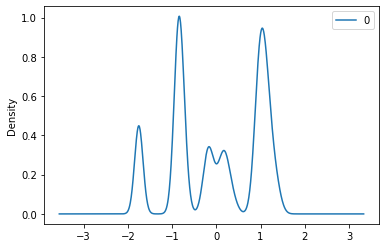

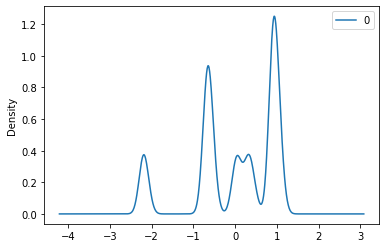

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         521.66
1         522.28
2         522.42
3         522.86
4         522.19
           ...  
160354    380.16
160355    535.02
160356    535.41
160357    187.92
160358    134.32
Name: sensor12, Length: 160359, dtype: float64>


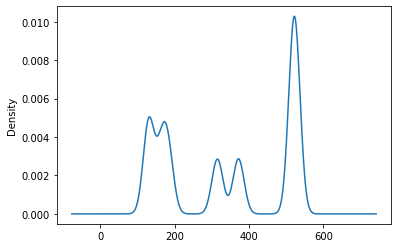

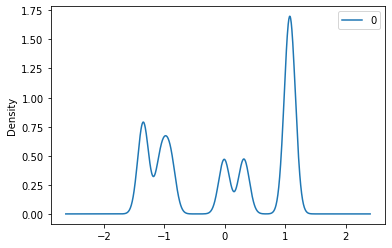

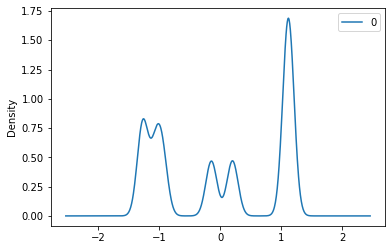

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         2388.02
1         2388.07
2         2388.03
3         2388.08
4         2388.04
           ...   
160354    2388.73
160355    2388.46
160356    2388.48
160357    2388.83
160358    2388.66
Name: sensor13, Length: 160359, dtype: float64>


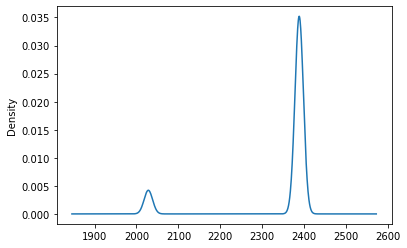

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


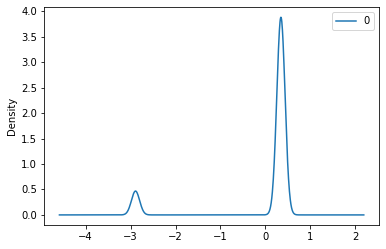

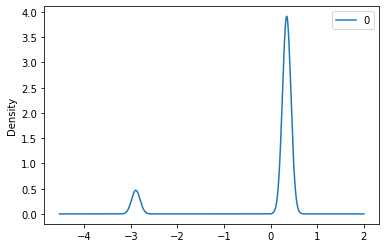

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         8138.62
1         8131.49
2         8133.23
3         8133.83
4         8133.80
           ...   
160354    8185.69
160355    8185.47
160356    8193.94
160357    8125.64
160358    8144.33
Name: sensor14, Length: 160359, dtype: float64>


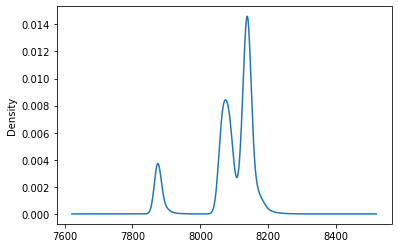

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


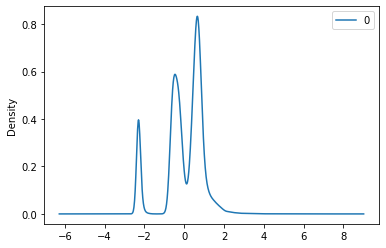

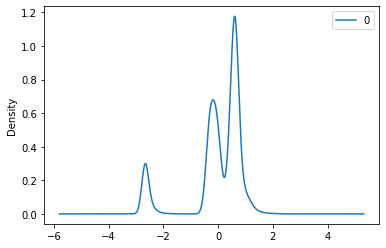

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         8.4195
1         8.4318
2         8.4178
3         8.3682
4         8.4294
           ...  
160354    8.4541
160355    8.2221
160356    8.2525
160357    9.0515
160358    9.1207
Name: sensor15, Length: 160359, dtype: float64>


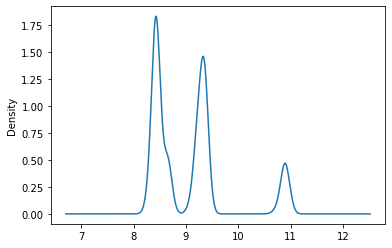

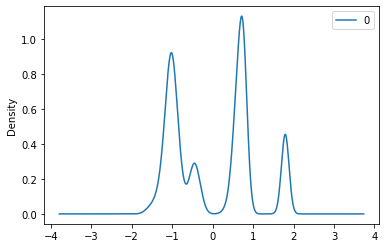

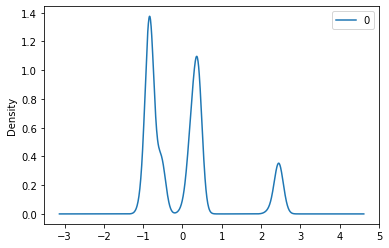

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         0.03
1         0.03
2         0.03
3         0.03
4         0.03
          ... 
160354    0.03
160355    0.03
160356    0.03
160357    0.02
160358    0.02
Name: sensor16, Length: 160359, dtype: float64>


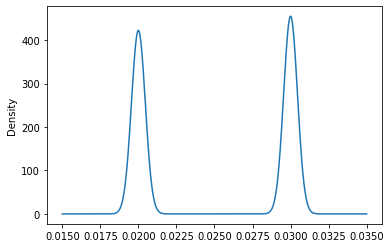

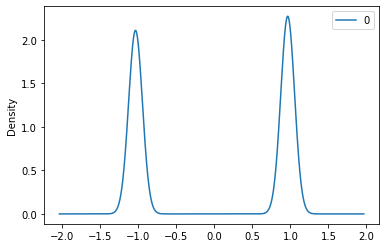

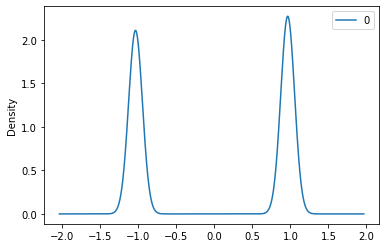

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         392
1         392
2         390
3         392
4         393
         ... 
160354    372
160355    396
160356    395
160357    337
160358    333
Name: sensor17, Length: 160359, dtype: int64>


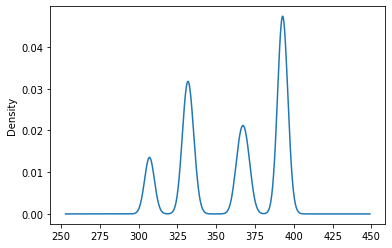

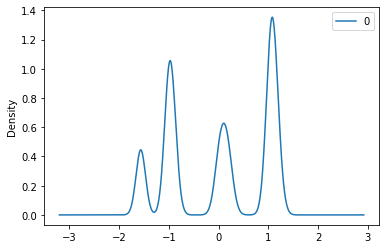

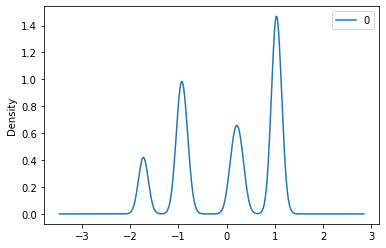

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         2388
1         2388
2         2388
3         2388
4         2388
          ... 
160354    2319
160355    2388
160356    2388
160357    2223
160358    2212
Name: sensor18, Length: 160359, dtype: int64>


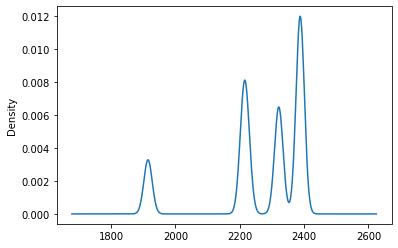

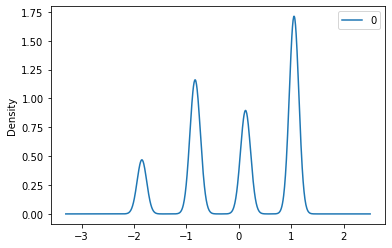

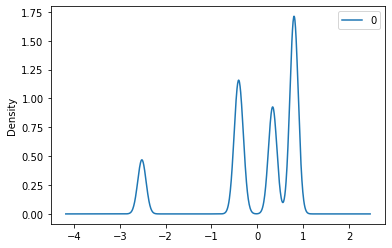

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         100.0
1         100.0
2         100.0
3         100.0
4         100.0
          ...  
160354    100.0
160355    100.0
160356    100.0
160357    100.0
160358    100.0
Name: sensor19, Length: 160359, dtype: float64>


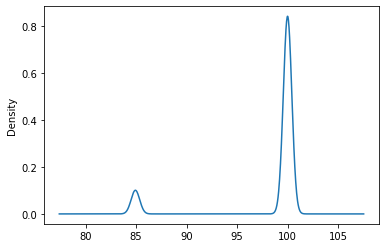

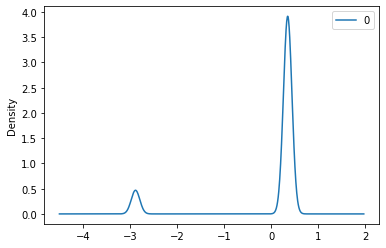

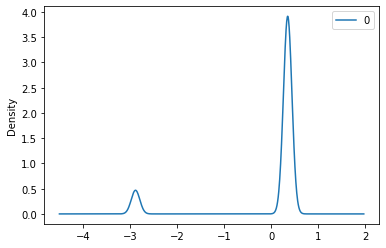

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         39.06
1         39.00
2         38.95
3         38.88
4         38.90
          ...  
160354    29.11
160355    39.38
160356    39.78
160357    15.26
160358    10.66
Name: sensor20, Length: 160359, dtype: float64>


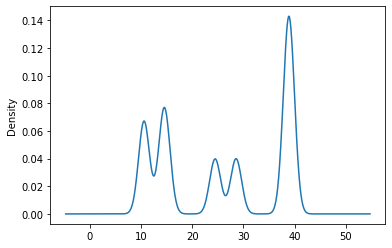

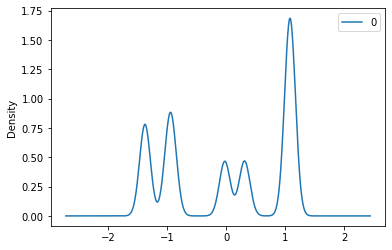

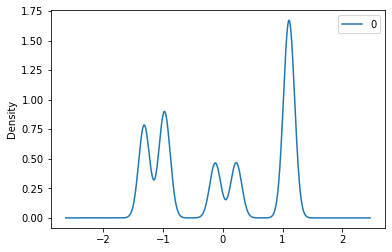

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         23.4190
1         23.4236
2         23.3442
3         23.3739
4         23.4044
           ...   
160354    17.5234
160355    23.7151
160356    23.8270
160357     9.0774
160358     6.4341
Name: sensor21, Length: 160359, dtype: float64>


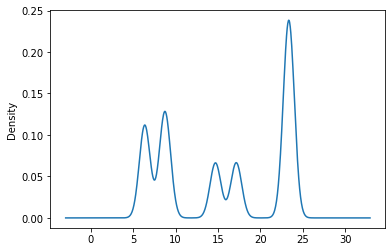

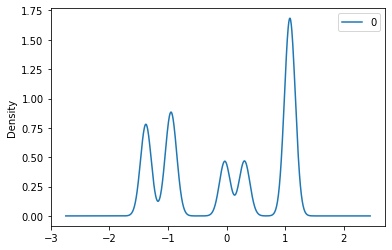

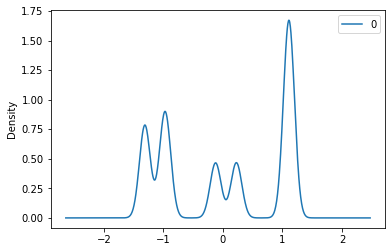

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
sc=StandardScaler()
for i in df.columns:
  df[i].plot(kind='kde')
  print(df[i].skew)
  plt.show()
  fff=df[i].values.reshape(-1,1)
  fd=pd.DataFrame(pt.fit_transform(fff))
  fd.plot(kind='kde')
  plt.show()
  fff=df[i].values.reshape(-1,1)
  fd=pd.DataFrame(sc.fit_transform(fff))
  fd.plot(kind='kde')
  plt.show()

In [ ]:
df

,Cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,251,9.9998,0.2500,100,489.05,605.33,1516.36,1315.28,10.52,15.46,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234
160355,252,0.0028,0.0015,100,518.67,643.42,1598.92,1426.77,14.62,21.57,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151
160356,253,0.0029,0.0000,100,518.67,643.68,1607.72,1430.56,14.62,21.57,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270
160357,254,35.0046,0.8400,100,449.44,555.77,1381.29,1148.18,5.48,7.96,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774


In [5]:
 n=3
 pca = PCA(n_components=n)

In [6]:
principalComponents = pca.fit_transform(df)

In [8]:
PR=pca.explained_variance_ratio_
PR2=np.round(PR,5)

In [9]:
PR2

array([0.90487, 0.0683 , 0.02342])

In [10]:
cols=["PC"+str(i+1) for i in range(n)]

In [11]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = cols)

In [12]:
principalDf

,PC1,PC2,PC3
0,-521.823298,58.152063,-124.806386
1,-520.561241,60.370113,-124.391319
2,-526.660483,60.577373,-123.035932
3,-522.802986,60.038176,-122.154978
4,-527.712092,60.446540,-120.908348
...,...,...,...
160354,-211.454434,-36.884373,133.474171
160355,-597.329764,60.788400,130.040081
160356,-608.687288,60.171990,131.989197
160357,363.532389,-143.943380,135.009207


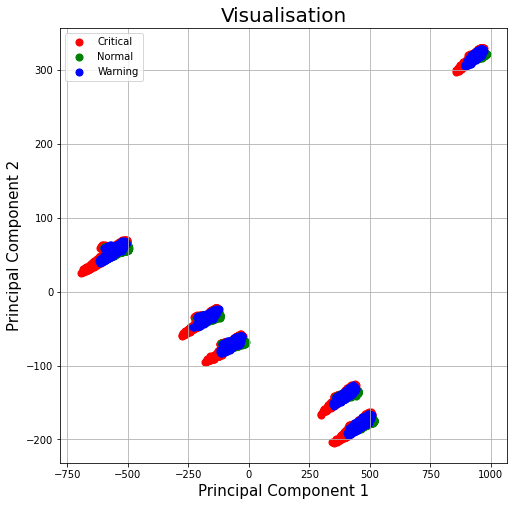

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Visualisation', fontsize = 20)
targets = ['Critical', 'Normal', 'Warning']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = Master_data['Sub_Status'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

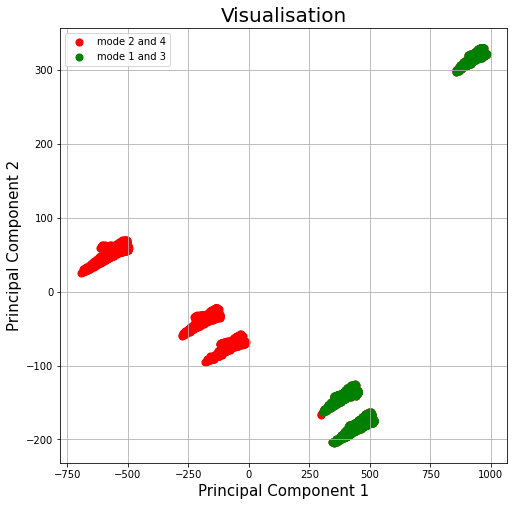

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Visualisation', fontsize = 20)
targets = [-900, 300]
modes=['mode 2 and 4','mode 1 and 3']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['PC1'] > target
    ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(modes)
ax.grid()

In [ ]:
principalDf['Engine_ID']=Master_data['Engine_ID']

In [ ]:
principalDf.to_csv("/content/drive/MyDrive/NASA_Turbofan/PC.csv")